# Linear Regression

## Introduction
Is an algorithm for fitting linear model. Given linear model described by equation $ y = wx + b $, it finds the values for $w$ and $b$ such that the model "fits" the provided data. Meaning, given input values $x$ it predicts as acurately as possible the values of $y$.<br>
<br>
For demonstration, look at the plot below. The blue dots are data points and the red line represents a model that has been fit to that data - it's $w$ and $b$ parameters are such that given linear equation $ y = wx + b $ it correctly predicts $y$ for given input values $x$.

![Linear model plot](linear_model_1.png)

The model from above example perfectly matches the data points. In real examples, however this will happen very rarely. In fact, the data points will almost always be such, that it is impossible to find parameters that put them all on the same line. See the example below for demonstration.

![Linear model plot - random data points](linear_model_2.png)

In this case, we can clearly see there is no straight, red line that we could draw, that would contain all the blue dots. How, then can we fit linear model's parameters to such data? By doing the best we can in that situation, which means finding parameters $w$ and $b$ to minimize for each $x$, the distance between model's prediction (the red line) - $\hat{y}$ and actual value for that data point - $y$. <br>
<br>
In other words we will calculate, and try to minimize, the error, also called the **cost function**.

## Calculating the error

The function that defines the error **for single data point** is called the **loss function**.<br>
<br>
For linear regression, the error value for each **individual** data point will be described as a **squarred** distance between model's prediction and actual value for that data point, found in the dataset. Mathematically, it is represented as:

$$
\tag{1}
\begin{equation}
l(y^{(j)}, \hat{y}^{(j)}) = (y^{(j)} - \hat{y}^{(j)})^2
\end{equation}
$$

Where:<br><br>
$j$ - index of a data point in a dataset.<br>
$y^{(j)}$ - value for j-th data point in the dataset.<br>
$\hat{y}^{(j)}$ - value predicted by the model, for j-th data point in the dataset.<br>

However, to calculate the error that can be used to fit the model, we need to know error for the whole dataset. To measure that we will take a mean of loss function values over all data points.<br>
This is called **cost function** and can be represented by equation (please don't confuse cost function symbol $J$ with $J$ used to represent matrix of ones in linear model notebook):

$$
\tag{2}
\begin{equation}
J(\hat{y},y) = {1 \over m}\displaystyle\sum_{j=0}^m{(\hat{y}^{(j)} - y^{(j)})^2}
\end{equation}
$$

Where:<br><br>
$m$ - number of data points in the dataset.<br>
<br><br>
It is worth to note that in most machine learning materials this cost function contains the factor of 2 in the denominator. The reason for that constant to be there is to simplify the equation after taking it's derivative (more on that later). The equation then is:

$$
\tag{3}
\begin{equation}
J(\hat{y}, y) = {1 \over 2m}\displaystyle\sum_{j=0}^m{(\hat{y}^{(j)} - y^{(j)})^2}
\end{equation}
$$
<br><br>
The value predicted by the model $\hat{y}$ represents the linear model: $\hat{y} = wx + b$, so equation $(3)$ can be finally presented as:

$$
\tag{4}
\begin{equation}
J(\hat{y}, y) = J(\vec{x}, b, y) = {1 \over 2m}\displaystyle\sum_{j=0}^m{(\vec{x}^{(j)}\vec{w} + b - y^{(j)})^2}
\end{equation}
$$

Where:<br><br>
$w$ - input variable coefficient, weights.<br>
$x^{(j)}$ - vector of independend variables for j-th data point.<br>
$b$ - bias coefficient.<br>

## Using Gradient Descent to fit parameters

Fitting the model to the data means we will find model parameters $\vec{w}$ and $b$ for which $J(\vec{w}, b, y)$ is minimal. For convenience let's define model parameters as single variable theta: $\theta = \{\vec{w}, b\}$. Our task then is to find $\theta_{opt}$ as:
$$
\tag{5}
\theta_{opt} = \argmin_{\theta} J(\theta, y)
$$
<br><br>
In order to find optimal parameters we will use a procedure called Gradient Descent. This algorithm requires us to iteratively update model parameters by subtracting from their values the derivatives of cost function taken with respect to model parameters. Properly calibrated Gradient Descent procedure should result in a process that can be visualised by the graph below - iteratively getting closer to minimal value of our cost function.

![Gradient Descent visualisation](gradient_descent_1.png)

The equations for updated $w$ and $b$ parameters are given below. The value of learning parameter - $\alpha$ is choosen somewhat arbitrarily, but it cannot be too great because the training process will fail to converge - the error will increase instead of going down with each iteration. Too low $\alpha$ on the other hand, can slow down the process unnecessarily. It is good practice to start with $\alpha = 0.001$ and then experiment with increasing it's value 3x time or 10x each time.

$$
\tag{6}
\vec{w}^{(k+1)} = \vec{w}^{(k)} - \alpha {\partial J \over \partial \vec{w}}
$$

$$
\tag{7}
b^{(k+1)} = b^{(k)} - \alpha {\partial J \over \partial b}
$$


Where:

$k$ - current iteration of Gradient Descent.

$k+1$ - next iteration of GD.

$\vec{w}^{(k)}$ - weights for the current iteration of GD.

$\vec{w}^{(k+1)}$ - weights for the next iteration of GD.

$b^{(k)}$ - bias value for the current iteration of GD.

$b^{(k+1)}$ - bias value for the next iteration of GD.

$\alpha$ - learning rate.



<br><br>
To clarify how to update each weight parameter, the equation below is presented, expanding vectors into individual values. The formulae following this one will refer to individual variables.

$$
\tag{8}
w^{(k+1)}_i = w^{(k)}_i - \alpha {\partial J \over \partial w_i}
$$


Where:

$i$ - index of the weight parameter.

$w^{(k)}_i$ - $i$-th weight value of the current GD iteration.


<br><br>
The derivative of cost function $J$ with respect to $w_i$:

$$
\tag{9}
\begin{equation}
\begin{split}
{\partial J \over \partial w_i} 
& = {\partial \over \partial w_i} \Big( {1 \over 2m}\displaystyle\sum_{j=0}^m{(x^{(j)}_i w_i + b - y^{(j)})^2} \Big) \\
& = { 1 \over 2m}\displaystyle\sum_{j=0}^m { {\partial \over \partial w_i} (x^{(j)}_i w_i + b - y^{(j)})^2 } \\
& = { 1 \over 2m}\displaystyle\sum_{j=0}^m { 2 (x^{(j)}_i w_i + b - y^{(j)}) {\partial \over \partial w_i} (x^{(j)}_i w_i + b - y^{(j)}) } \\
& = { 1 \over 2m}\displaystyle\sum_{j=0}^m { 2 (x^{(j)}_i w_i + b - y^{(j)}) x^{(j)}_i } \\
& = { 1 \over m}\displaystyle\sum_{j=0}^m { (\hat{y}^{(j)} - y^{(j)}) x^{(j)}_i }
\end{split}
\end{equation}
$$


<br><br>
And the same for bias parameter $b$:

$$
\tag{10}
\begin{equation}
\begin{split}
{\partial J \over \partial b} 
& = {\partial \over \partial b} \Big( {1 \over 2m}\displaystyle\sum_{j=0}^m{(x^{(j)}_i w_i + b - y^{(j)})^2} \Big) \\
& = { 1 \over 2m}\displaystyle\sum_{j=0}^m { {\partial \over \partial b} (x^{(j)}_i w_i + b - y^{(j)})^2 } \\
& = { 1 \over 2m}\displaystyle\sum_{j=0}^m { 2 (x^{(j)}_i w_i + b - y^{(j)}) {\partial \over \partial b} (x^{(j)}_i w_i + b - y^{(j)}) } \\
& = { 1 \over m}\displaystyle\sum_{j=0}^m { (x^{(j)}_i w_i + b - y^{(j)} ) } \\
& = { 1 \over m}\displaystyle\sum_{j=0}^m { (\hat{y}^{(j)} - y^{(j)}) }
\end{split}
\end{equation}
$$

<br><br>
Putting it all together, the equations for updating model parameters in each step of Gradient Descent are as follows:

$$
\tag{11}
w^{(k+1)}_i = w^{(k)}_i - \alpha { 1 \over m}\displaystyle\sum_{j=0}^m { (\hat{y}^{(j)} - y^{(j)}) x_i }
$$

$$
\tag{12}
b^{(k+1)}_i = b^{(k)}_i - \alpha { 1 \over m}\displaystyle\sum_{j=0}^m { (\hat{y}^{(j)} - y^{(j)}) }
$$

## Implementation

Import needed libraries:

In [17]:
from typing import Union

import numpy as np
from matplotlib import pyplot as plt


Implementation of equation $(4)$ - mean squarred error for the dataset:

In [3]:
# Cost function implementation

def mean_squarred_error(y_hat: np.ndarray, 
                        y: np.ndarray) -> float:
    """Cost function calculating loss on model output and ground truth.

    Calculates cost function as mean squarred error.

    Args:
        y_hat (np.ndarray): model output vector.
        y (np.ndarray): ground truth vector.

    Returns:
        float: cost function result - error value.
    """
    assert len(y_hat) == len(y), \
        "y_hat and y have to be the same length!"
    assert isinstance(y_hat, np.ndarray), "y_hat must be numpy array!"
    assert isinstance(y, np.ndarray), "y must be numpy array!"
    assert len(y.shape) == 1 or \
           (len(y.shape) == 2 and y.shape[1] == 1), \
           "y must be one dimensional!"
    assert len(y_hat.shape) == 1 or \
           (len(y_hat.shape) == 2 and y_hat.shape[1] == 1), \
           "y_hat must be one dimensional!"
    
    loss = np.power(y_hat - y, 2)
    m = len(y)
    cost = np.sum(loss) / (m * 2)
    return cost

Implementation of equation $(9)$ - derivative of cost function with respect to weights parameters. 

In [4]:
def dJ_w(y_hat: np.ndarray, 
         y: np.ndarray,
         x: np.ndarray) -> np.ndarray:
    """Calculate dJ/dw.

    Returns numpy array of derivatives of mean squarred error cost 
    function derivatives with respect to weight parameters.

    Args:
        y_hat (np.ndarray): model output vector.
        y (np.ndarray): ground truth vector.
        x (np.ndarray): input variables (all inputs for all samples).

    Returns:
        np.ndarray: array of values of derivatives.
    """
    assert len(y_hat) == len(y), \
        "y_hat and y have to be the same length!"
    assert isinstance(y_hat, np.ndarray), "y_hat must be numpy array!"
    assert isinstance(y, np.ndarray), "y must be numpy array!"
    assert isinstance (x, np.ndarray), "x must be numpy array!"
    assert len(y.shape) == 1 or \
           (len(y.shape) == 2 and y.shape[1] == 1), \
           "y must be one dimensional!"
    assert len(y_hat.shape) == 1 or \
           (len(y_hat.shape) == 2 and y_hat.shape[1] == 1), \
           "y_hat must be one dimensional!"
    assert x.shape[0] == len(y), "x must be of shape (m, n)!"
    
    m = len(y)

    # reshape if needed
    if len(y_hat.shape) == 2:
        y_hat = y_hat.reshape((m, 1))
    if len(y.shape) == 2:
        y = y.reshape((m, 1))
    
    dJ_w_values = np.sum((y_hat - y) * x, axis=0) / m
    return dJ_w_values

Implementation of equation $(10)$ - derivative of cost function with respect to bias parameter.

In [5]:
def dJ_b(y_hat: np.ndarray, 
         y: np.ndarray) -> float:
    """Calculate dJ/db.

    Returns numpy array of derivatives of mean squarred error cost 
    function derivatives with respect to bias parameter.

    Args:
        y_hat (np.ndarray): model output vector.
        y (np.ndarray): ground truth vector.

    Returns:
        np.ndarray: array of values of derivatives.
    """
    assert len(y_hat) == len(y), \
        "y_hat and y have to be the same length!"
    assert isinstance(y_hat, np.ndarray), "y_hat must be numpy array!"
    assert isinstance(y, np.ndarray), "y must be numpy array!"
    assert isinstance (x, np.ndarray), "x must be numpy array!"
    assert len(y.shape) == 1 or \
           (len(y.shape) == 2 and y.shape[1] == 1), \
           "y must be one dimensional!"
    assert len(y_hat.shape) == 1 or \
           (len(y_hat.shape) == 2 and y_hat.shape[1] == 1), \
           "y_hat must be one dimensional!"
    
    m = len(y)

    # reshape if needed
    if len(y_hat.shape) == 2:
        y_hat = y_hat.reshape((m, 1))
    if len(y.shape) == 2:
        y = y.reshape((m, 1))
    
    dJ_b_values = np.sum((y_hat - y)) / m
    return dJ_b_values

Linear model output to get model predictions.

In [6]:
# Linear model function

def linear_model_output(x: np.ndarray, 
                        w: np.ndarray, 
                        b: float) -> np.ndarray:
    """Calculates linear model output.

    Args:
        x (np.ndarray): input variables of shape (m,n).
        w (np.ndarray): weight parameters of shape (1,n).
        b (float): bias parameter.

    Returns:
        np.ndarray: linear model prediction values of shape (m,1).
    """
    assert isinstance(w, np.ndarray), "w must be numpy array!"
    assert isinstance(w, np.ndarray), "w must be numpy array!"
    assert len(w.shape) == 2 and w.shape[1] == 1, \
           "w must be numpy array of shape (n,1)!"
    assert len(w.shape) == 2, \
           "w must be two dimensional numpy array of shape (m,n)!"
    y_hat = np.dot(x, w) + b
    return y_hat

Putting it all together - implementation of Gradient Descent algorithm.

In [39]:
# Gradient Descent implementation

# Return type definition
GradientDescentResult = dict[str, Union[np.ndarray, float]]


def gradient_descent(y: np.ndarray, 
                     x: np.ndarray,  
                     alpha: float,
                     b_init: float = None, 
                     w_init: np.ndarray = None,
                     num_epochs: int = 1000) -> GradientDescentResult:
    """_summary_

    Args:
        y (np.ndarray): _description_
        x (np.ndarray): _description_
        b (float): _description_
        alpha (float): _description_
        w_init (np.ndarray, optional): _description_. Defaults to None.
        num_epochs (int, optional): _description_. Defaults to 1000.

    Returns:
        GradientDescentResult: _description_
    """
    # initialise parameters to zero
    input_size = x.shape[1]
    if w_init:
        w = w_init
    else:
        w = np.zeros((input_size, 1), dtype=float)

    if b_init:
        b = b_init
    else:
        b = 0.0

    for _ in range(num_epochs):
        y_hat = linear_model_output(x, w, b)
        error = mean_squarred_error(y_hat, y)
        dJ_w_values = dJ_w(y_hat, y, x)
        dJ_b_values = dJ_b(y_hat, y)
        w = w - alpha * dJ_w_values
        b = b - alpha * dJ_b_values
    
    return_dict = {
        "w": w,
        "b": b,
        "error": error
    }
    return return_dict

## Demo

The following code is a demonstration of Gradient Descent implementation done above.<br>
It will run on randomly generated data representing linear trend with some noise.<br>
<br>
First, we will generate that data.

In [36]:
# Create x, reshape to column vector
a = 10.2
b = 3.4

x = np.linspace(0, 6, 100).reshape((-1, 1))
e = np.random.randint(-10, 10, x.shape)
y = a*x + b + e

Let's visualize the data on a scatter plot.

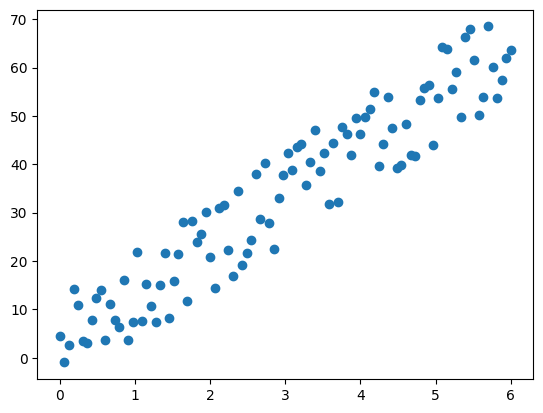

In [37]:
plt.scatter(x, y)
plt.show()

Now it's time to run Gradient Descent. The function that was implemented will return optimal model parameters $w$ and $b$, as well as error value.

In [62]:
result = gradient_descent(x=x, y=y, alpha=0.1, num_epochs=1000)

print("Result:")
print(f"Error: {result['error']}")
print(f"w: {result['w']}")
print(f"b: {result['b']}")

Result:
Error: 18.89854746474647
w: [[10.19871287]]
b: 3.133861386122111


Let's visualize it by plotting the original data and model prediction on the same plot.

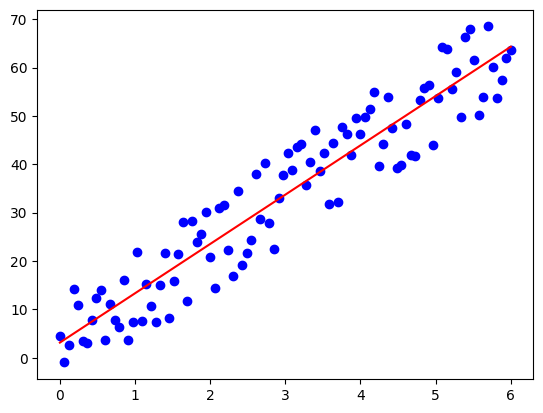

In [63]:
y_pred = x*result["w"] + result["b"]

plt.scatter(x, y, color='b')
plt.plot(x, y_pred, color='r')

plt.show()